In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import classifier_utils
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
def update_projects_names(project_name):
    names = {'aosp-mirror/platform_frameworks_base':'android/platform_frameworks_base',
            'TeamDev-Archive/OpenFaces': 'TeamDev-Ltd/OpenFaces',
            'TelluIoT/ThingML': 'SINTEF-9012/ThingML'}
    if project_name in names:
        return names[project_name]
    return project_name

In [3]:
df = pd.read_csv('../../data/selected_projects_statistics.csv')
df = df.rename(columns={"Project": "project"})
df['project'] = df['project'].apply(update_projects_names)
df

,project,Chunks,Merges,Conflicting Merges,Commits,Developers,Stars
0,sebastianbenz/Jnario,10372.0,32.0,5.0,1635.0,8.0,53.0
1,CCI-MIT/XCoLab,6889.0,579.0,124.0,3865.0,12.0,4.0
2,apache/accumulo,5141.0,2548.0,784.0,8364.0,56.0,187.0
3,android/platform_frameworks_base,4446.0,156732.0,3355.0,246462.0,115.0,3286.0
4,TeamDev-Ltd/OpenFaces,3723.0,611.0,178.0,3611.0,16.0,9.0
5,jgralab/jgralab,2590.0,407.0,101.0,7871.0,10.0,13.0
6,alexo/wro4j,2078.0,1458.0,395.0,4565.0,37.0,318.0
7,eclipse/jetty.project,1921.0,1882.0,524.0,12935.0,35.0,602.0
8,CloudStack-extras/CloudStack-archive,1779.0,829.0,132.0,33294.0,29.0,5.0
9,freenet/fred,1584.0,1076.0,237.0,30970.0,62.0,253.0


In [4]:
def fix_project_name(project_name):
    return project_name.replace('__','/')
df_results = pd.read_csv('../../data/results/experiment_results.csv')
df_results['project'] = df_results['project'].apply(fix_project_name)
df_results = df_results.dropna()
df_results = df_results[df_results.project != 'Overall']
df_results

,project,accuracy_cv,baseline,accuracy_test,norm._improv.,precision,recall,f1-score
0,CCI-MIT/XCoLab,0.976,0.573,0.980,0.953,0.978,0.980,0.978
1,apache/directory-server,0.937,0.533,0.922,0.833,0.922,0.922,0.921
2,jgralab/jgralab,0.866,0.504,0.882,0.762,0.877,0.882,0.877
3,CloudStack-extras/CloudStack-archive,0.806,0.428,0.814,0.675,0.830,0.814,0.817
4,apache/accumulo,0.863,0.642,0.870,0.637,0.863,0.870,0.864
5,Unidata/thredds,0.916,0.722,0.913,0.687,0.908,0.913,0.908
6,Ramblurr/Anki-Android,0.742,0.441,0.810,0.660,0.794,0.810,0.800
7,getrailo/railo,0.712,0.393,0.705,0.514,0.705,0.705,0.695
8,apache/lucene-solr,0.646,0.267,0.623,0.486,0.613,0.623,0.609
9,TeamDev-Ltd/OpenFaces,0.969,0.942,0.968,0.448,0.961,0.968,0.964


In [5]:
df = df.merge(df_results, how='inner', on='project')
df

,project,Chunks,Merges,Conflicting Merges,Commits,Developers,Stars,accuracy_cv,baseline,accuracy_test,norm._improv.,precision,recall,f1-score
0,sebastianbenz/Jnario,10372.0,32.0,5.0,1635.0,8.0,53.0,0.999,1.000,1.000,0.000,0.999,1.000,0.999
1,CCI-MIT/XCoLab,6889.0,579.0,124.0,3865.0,12.0,4.0,0.976,0.573,0.980,0.953,0.978,0.980,0.978
2,apache/accumulo,5141.0,2548.0,784.0,8364.0,56.0,187.0,0.863,0.642,0.870,0.637,0.863,0.870,0.864
3,android/platform_frameworks_base,4446.0,156732.0,3355.0,246462.0,115.0,3286.0,0.817,0.660,0.823,0.479,0.812,0.823,0.815
4,TeamDev-Ltd/OpenFaces,3723.0,611.0,178.0,3611.0,16.0,9.0,0.969,0.942,0.968,0.448,0.961,0.968,0.964
5,jgralab/jgralab,2590.0,407.0,101.0,7871.0,10.0,13.0,0.866,0.504,0.882,0.762,0.877,0.882,0.877
6,alexo/wro4j,2078.0,1458.0,395.0,4565.0,37.0,318.0,0.584,0.325,0.617,0.433,0.608,0.617,0.609
7,CloudStack-extras/CloudStack-archive,1779.0,829.0,132.0,33294.0,29.0,5.0,0.806,0.428,0.814,0.675,0.830,0.814,0.817
8,freenet/fred,1584.0,1076.0,237.0,30970.0,62.0,253.0,0.679,0.431,0.684,0.445,0.667,0.684,0.671
9,apache/lucene-solr,1570.0,490.0,187.0,40406.0,44.0,809.0,0.646,0.267,0.623,0.486,0.613,0.623,0.609


In [6]:
df = df[['project',	'Commits','Merges', 'Conflicting Merges', 'Chunks', 'Developers','Stars', 'norm._improv.', 'accuracy_test']].copy()
df = df.rename(columns = {'accuracy_test': 'accuracy', 'norm._improv.': 'norm. improv.'})
df

,project,Commits,Merges,Conflicting Merges,Chunks,Developers,Stars,norm. improv.,accuracy
0,sebastianbenz/Jnario,1635.0,32.0,5.0,10372.0,8.0,53.0,0.000,1.000
1,CCI-MIT/XCoLab,3865.0,579.0,124.0,6889.0,12.0,4.0,0.953,0.980
2,apache/accumulo,8364.0,2548.0,784.0,5141.0,56.0,187.0,0.637,0.870
3,android/platform_frameworks_base,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.479,0.823
4,TeamDev-Ltd/OpenFaces,3611.0,611.0,178.0,3723.0,16.0,9.0,0.448,0.968
5,jgralab/jgralab,7871.0,407.0,101.0,2590.0,10.0,13.0,0.762,0.882
6,alexo/wro4j,4565.0,1458.0,395.0,2078.0,37.0,318.0,0.433,0.617
7,CloudStack-extras/CloudStack-archive,33294.0,829.0,132.0,1779.0,29.0,5.0,0.675,0.814
8,freenet/fred,30970.0,1076.0,237.0,1584.0,62.0,253.0,0.445,0.684
9,apache/lucene-solr,40406.0,490.0,187.0,1570.0,44.0,809.0,0.486,0.623


In [7]:
df.corr()

,Commits,Merges,Conflicting Merges,Chunks,Developers,Stars,norm. improv.,accuracy
Commits,1.000000,0.977229,0.940503,0.089957,0.436326,0.862829,-0.008002,-0.058399
Merges,0.977229,1.000000,0.960815,0.170761,0.417194,0.857666,-0.024117,0.011924
Conflicting Merges,0.940503,0.960815,1.000000,0.155842,0.411446,0.808292,-0.013413,-0.084926
Chunks,0.089957,0.170761,0.155842,1.000000,-0.161205,0.041168,-0.130415,0.511701
Developers,0.436326,0.417194,0.411446,-0.161205,1.000000,0.768932,-0.094736,-0.476056
Stars,0.862829,0.857666,0.808292,0.041168,0.768932,1.000000,-0.102821,-0.276862
norm. improv.,-0.008002,-0.024117,-0.013413,-0.130415,-0.094736,-0.102821,1.000000,0.158936
accuracy,-0.058399,0.011924,-0.084926,0.511701,-0.476056,-0.276862,0.158936,1.000000


<AxesSubplot:>

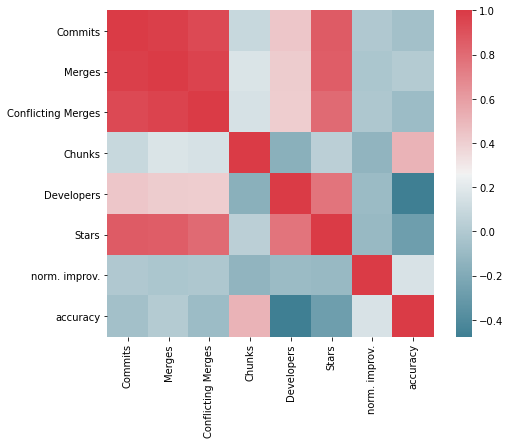

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
display(sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax))

In [9]:
# find best suitable number of clusters
from sklearn.metrics import silhouette_score
columns = ['Commits', 'Merges', 'Conflicting Merges', 'Chunks', 'Developers', 'Stars']

# the higher the better
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[columns])
    score = silhouette_score(df[columns], kmeans.labels_)
    silhouette_coefficients.append(score)

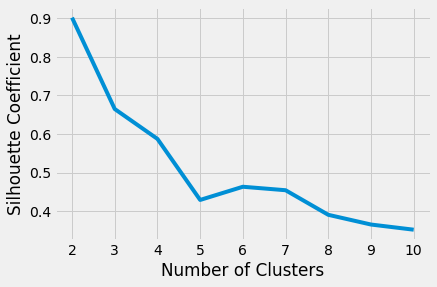

In [10]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df[columns])
df['category'] = kmeans.labels_
centroids = kmeans.cluster_centers_
display(df.sort_values(by=['norm. improv.'], ascending=False))

,project,Commits,Merges,Conflicting Merges,Chunks,Developers,Stars,norm. improv.,accuracy,category
1,CCI-MIT/XCoLab,3865.0,579.0,124.0,6889.0,12.0,4.0,0.953,0.980,0
18,apache/directory-server,12914.0,50.0,18.0,1056.0,12.0,21.0,0.833,0.922,0
5,jgralab/jgralab,7871.0,407.0,101.0,2590.0,10.0,13.0,0.762,0.882,0
10,Unidata/thredds,10156.0,973.0,49.0,1442.0,30.0,113.0,0.687,0.913,0
7,CloudStack-extras/CloudStack-archive,33294.0,829.0,132.0,1779.0,29.0,5.0,0.675,0.814,0
17,Ramblurr/Anki-Android,4905.0,952.0,155.0,1115.0,62.0,64.0,0.660,0.810,0
2,apache/accumulo,8364.0,2548.0,784.0,5141.0,56.0,187.0,0.637,0.870,0
19,getrailo/railo,5215.0,671.0,163.0,1018.0,15.0,266.0,0.514,0.705,0
12,zkoss/zk,24054.0,2054.0,645.0,1358.0,36.0,177.0,0.510,0.787,0
9,apache/lucene-solr,40406.0,490.0,187.0,1570.0,44.0,809.0,0.486,0.623,0


In [12]:
df[df['category']==0].describe().round(1)

,Commits,Merges,Conflicting Merges,Chunks,Developers,Stars,norm. improv.,accuracy,category
count,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
mean,13822.3,1133.0,222.7,2529.1,38.5,242.1,0.5,0.8,0.0
std,11873.4,1367.2,229.8,2453.4,38.5,416.1,0.2,0.1,0.0
min,1635.0,32.0,5.0,1018.0,8.0,4.0,0.0,0.6,0.0
25%,4735.0,346.0,41.0,1262.0,14.5,18.5,0.4,0.7,0.0
50%,9603.0,671.0,155.0,1442.0,30.0,113.0,0.5,0.8,0.0
75%,23838.5,1267.0,316.0,2334.0,45.5,259.5,0.7,0.9,0.0
max,40406.0,5880.0,784.0,10372.0,180.0,1765.0,1.0,1.0,0.0


In [13]:
df[df['category']==1].describe().round(1)

,Commits,Merges,Conflicting Merges,Chunks,Developers,Stars,norm. improv.,accuracy,category
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.5,0.8,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.5,0.8,1.0
25%,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.5,0.8,1.0
50%,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.5,0.8,1.0
75%,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.5,0.8,1.0
max,246462.0,156732.0,3355.0,4446.0,115.0,3286.0,0.5,0.8,1.0


In [14]:
df1 = df.groupby('category').describe().unstack().unstack(1)
df1.round(2)

count       mean       std        min        25%  \
                   category                                                     
Commits            0          19.0   13822.26  11873.41    1635.00    4735.00   
                   1           1.0  246462.00       NaN  246462.00  246462.00   
Merges             0          19.0    1133.00   1367.21      32.00     346.00   
                   1           1.0  156732.00       NaN  156732.00  156732.00   
Conflicting Merges 0          19.0     222.74    229.81       5.00      41.00   
                   1           1.0    3355.00       NaN    3355.00    3355.00   
Chunks             0          19.0    2529.05   2453.38    1018.00    1262.00   
                   1           1.0    4446.00       NaN    4446.00    4446.00   
Developers         0          19.0      38.47     38.48       8.00      14.50   
                   1           1.0     115.00       NaN     115.00     115.00   
Stars              0          19.0     242.11    416.10       4.00      18.50   
                   1           1.0    3286.00       NaN    3286.00    3286.00   
norm. improv.      0          19.0       0.50      0.24       0.00       0.38   
                   1           1.0       0.48       NaN       0.48       0.48   
accuracy           0          19.0       0.81      0.14       0.60       0.67   
                   1           1.0       0.82       NaN       0.82       0.82   

                                   50%        75%        max  
                   category                                   
Commits            0           9603.00   23838.50   40406.00  
                   1         246462.00  246462.00  246462.00  
Merges             0            671.00    1267.00    5880.00  
                   1         156732.00  156732.00  156732.00  
Conflicting Merges 0            155.00     316.00     784.00  
                   1           3355.00    3355.00    3355.00  
Chunks             0           1442.00    2334.00   10372.00  
                   1           4446.00    4446.00    4446.00  
Developers         0             30.00      45.50     180.00  
                   1            115.00     115.00     115.00  
Stars              0            113.00     259.50    1765.00  
                   1           3286.00    3286.00    3286.00  
norm. improv.      0              0.49       0.67       0.95  
                   1              0.48       0.48       0.48  
accuracy           0              0.81       0.93       1.00  
                   1              0.82       0.82       0.82

In [15]:
data = []
data_columns = ['cluster']
data_columns.extend(columns)
for cluster in range(0,2):
    cluster_data = []
    cluster_data.append(cluster)
    for index, column in enumerate(columns):
        cluster_data.append(centroids[cluster][index])
    data.append(cluster_data)
pd.DataFrame(data, columns=data_columns).round(1)

,cluster,Commits,Merges,Conflicting Merges,Chunks,Developers,Stars
0,0,13822.3,1133.0,222.7,2529.1,38.5,242.1
1,1,246462.0,156732.0,3355.0,4446.0,115.0,3286.0
